In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("supermarket_sales - Sheet1.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
df.shape # How Many Rows and colomns?

(1000, 17)

In [4]:
df.info() # Types of Data and check for non null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
df = df.drop("Branch",axis = 1) # Drop unnecessary colomns

In [6]:
df["Date"] = pd.to_datetime(df["Date"]) # Convert Date colomn from string type to date type

In [7]:
df["Date"].dtype

dtype('<M8[ns]')

In [8]:
df["Hour"] = df["Time"].str[0:2] # Add a new coloum named hour
df.head()

,Invoice ID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Hour
0,750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,13
1,226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,10
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,13
3,123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,20
4,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,10


In [9]:
df["Date"] = df["Date"].dt.strftime('%Y-%m-%d')
df["Month"] = df["Date"].str[5:7]

df["Month"].unique()

df["Month"] = df["Month"].map({"01":"January","02":"February","03": "March"})

In [10]:
df['Invoice ID'].is_unique # Check if Invoice Id field is unique

True

In [11]:
df.set_index("Invoice ID",inplace =True) # Make Invoice ID colomn into index

In [12]:
df.head()

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Hour,Month
Invoice ID,,,,,,,,,,,,,,,,,
750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,13,January
226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,10,March
631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,13,March
123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,20,January
373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,10,February


# Gender

In [13]:
df["Gender"].unique() # Find unique

array(['Female', 'Male'], dtype=object)

In [14]:
df["Gender"].value_counts() # Total number of male and female

Female    501
Male      499
Name: Gender, dtype: int64

In [15]:
# x = df["Gender"]
# y = df.shape[0]
# plt.bar(x,y)

In [16]:
gb = df.groupby("Gender")
Male_df = gb.get_group("Male")
Female_df = gb.get_group("Female")
Male_df.head()

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Hour,Month
Invoice ID,,,,,,,,,,,,,,,,,
631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,13,March
123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,20,January
373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,10,February
699-14-3026,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,2019-03-25,18:30,Ewallet,597.73,4.761905,29.8865,4.1,18,March
529-56-3974,Mandalay,Member,Male,Electronic accessories,25.51,4,5.1020,107.1420,2019-03-09,17:03,Cash,102.04,4.761905,5.1020,6.8,17,March


In [17]:
Male_df["Product line"].value_counts()

Health and beauty         88
Electronic accessories    86
Food and beverages        84
Fashion accessories       82
Home and lifestyle        81
Sports and travel         78
Name: Product line, dtype: int64

In [18]:
Female_df["Product line"].value_counts()

Fashion accessories       96
Food and beverages        90
Sports and travel         88
Electronic accessories    84
Home and lifestyle        79
Health and beauty         64
Name: Product line, dtype: int64

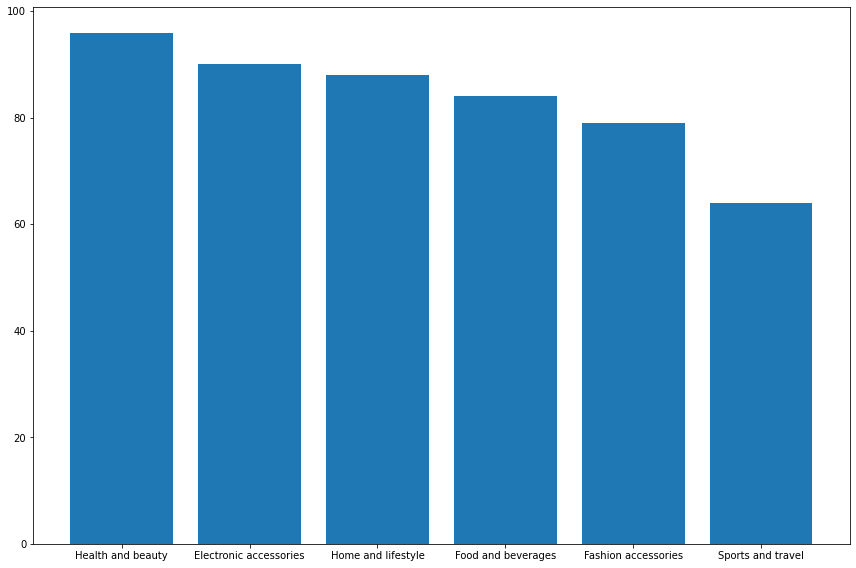

In [19]:
plt.figure(figsize=(12,8))
x = Female_df["Product line"].unique()
y = Female_df["Product line"].value_counts()
plt.bar(x,y)
plt.tight_layout()

In [20]:
Male_df["Payment"].value_counts()

Ewallet        185
Cash           166
Credit card    148
Name: Payment, dtype: int64

In [21]:
Female_df["Payment"].value_counts()

Cash           178
Credit card    163
Ewallet        160
Name: Payment, dtype: int64

# City

In [22]:
df["City"].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [23]:
df["City"].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

In [24]:
gb = df.groupby("City")   
Yangon_df = gb.get_group("Yangon")
Naypyitaw_df = gb.get_group("Naypyitaw")
Mandalay_df = gb.get_group("Mandalay")
Yangon_df.head()


,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Hour,Month
Invoice ID,,,,,,,,,,,,,,,,,
750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,13,January
631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,13,March
123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,20,January
373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,10,February
355-53-5943,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2019-02-25,14:36,Ewallet,413.04,4.761905,20.6520,5.8,14,February


In [25]:
Naypyitaw_df.head()

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Hour,Month
Invoice ID,,,,,,,,,,,,,,,,,
226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,10,March
699-14-3026,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,2019-03-25,18:30,Ewallet,597.73,4.761905,29.8865,4.1,18,March
315-22-5665,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2019-02-24,11:38,Ewallet,735.60,4.761905,36.7800,8.0,11,February
300-71-4605,Naypyitaw,Member,Male,Electronic accessories,86.04,5,21.5100,451.7100,2019-02-25,11:24,Ewallet,430.20,4.761905,21.5100,4.8,11,February
183-56-6882,Naypyitaw,Member,Female,Food and beverages,99.42,4,19.8840,417.5640,2019-02-06,10:42,Ewallet,397.68,4.761905,19.8840,7.5,10,February


In [26]:
Mandalay_df.head()

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Hour,Month
Invoice ID,,,,,,,,,,,,,,,,,
692-92-5582,Mandalay,Member,Female,Food and beverages,54.84,3,8.226,172.746,2019-02-20,13:27,Credit card,164.52,4.761905,8.226,5.9,13,February
351-62-0822,Mandalay,Member,Female,Fashion accessories,14.48,4,2.896,60.816,2019-02-06,18:07,Ewallet,57.92,4.761905,2.896,4.5,18,February
529-56-3974,Mandalay,Member,Male,Electronic accessories,25.51,4,5.102,107.142,2019-03-09,17:03,Cash,102.04,4.761905,5.102,6.8,17,March
299-46-1805,Mandalay,Member,Female,Sports and travel,93.72,6,28.116,590.436,2019-01-15,16:19,Cash,562.32,4.761905,28.116,4.5,16,January
319-50-3348,Mandalay,Normal,Female,Home and lifestyle,40.30,2,4.030,84.630,2019-03-11,15:30,Ewallet,80.60,4.761905,4.030,4.4,15,March


In [27]:
Mandalay_df["gross income"].sum()

5057.032

In [28]:
Naypyitaw_df["gross income"].sum()

5265.1765

In [29]:
Yangon_df["gross income"].sum()

5057.1605

In [30]:
Mandalay_df["Product line"].value_counts()

Fashion accessories       62
Sports and travel         62
Electronic accessories    55
Health and beauty         53
Food and beverages        50
Home and lifestyle        50
Name: Product line, dtype: int64

In [31]:
Naypyitaw_df["Product line"].value_counts()

Food and beverages        66
Fashion accessories       65
Electronic accessories    55
Health and beauty         52
Home and lifestyle        45
Sports and travel         45
Name: Product line, dtype: int64

In [32]:
Yangon_df["Product line"].value_counts()

Home and lifestyle        65
Electronic accessories    60
Sports and travel         59
Food and beverages        58
Fashion accessories       51
Health and beauty         47
Name: Product line, dtype: int64

# Payment

In [33]:
df["Payment"].unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

In [34]:
Mandalay_df["Payment"].value_counts()

Ewallet        113
Cash           110
Credit card    109
Name: Payment, dtype: int64

In [35]:
Yangon_df["Payment"].value_counts()

Ewallet        126
Cash           110
Credit card    104
Name: Payment, dtype: int64

In [36]:
Naypyitaw_df["Payment"].value_counts()

Cash           124
Ewallet        106
Credit card     98
Name: Payment, dtype: int64

In [37]:
df.head()

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Hour,Month
Invoice ID,,,,,,,,,,,,,,,,,
750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,13,January
226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,10,March
631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,13,March
123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,20,January
373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,10,February


In [38]:
# x = Naypyitaw_df["gross income"]
# y = Yangon_df["gross income"]
# z = Mandalay_df["gross income"]
# plt.figure(figsize=(12,7))
# plt.plot(x,y)

In [39]:
# df["Date"] = df["Date"].dt.strftime('%Y-%m-%d')
# df["Month"] = df["Date"].str[5:7]
# df["Month"] = df["Date"].str[5:7]
# df["Month"].unique()

In [40]:
df["Month"] = df["Date"].str[5:7]
df["Month"].unique()

array(['01', '03', '02'], dtype=object)

In [41]:
df.head()

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Hour,Month
Invoice ID,,,,,,,,,,,,,,,,,
750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,13,01
226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,10,03
631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,13,03
123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,20,01
373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,10,02


In [42]:
df["Month"] = df["Month"].map({"01":"January","02":"February","03": "March"})

In [43]:
df.head()

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Hour,Month
Invoice ID,,,,,,,,,,,,,,,,,
750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,13,January
226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,10,March
631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,13,March
123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,20,January
373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,10,February


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 750-67-8428 to 849-09-3807
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City                     1000 non-null   object 
 1   Customer type            1000 non-null   object 
 2   Gender                   1000 non-null   object 
 3   Product line             1000 non-null   object 
 4   Unit price               1000 non-null   float64
 5   Quantity                 1000 non-null   int64  
 6   Tax 5%                   1000 non-null   float64
 7   Total                    1000 non-null   float64
 8   Date                     1000 non-null   object 
 9   Time                     1000 non-null   object 
 10  Payment                  1000 non-null   object 
 11  cogs                     1000 non-null   float64
 12  gross margin percentage  1000 non-null   float64
 13  gross income             1000 non-null   float64
 14  Rating      

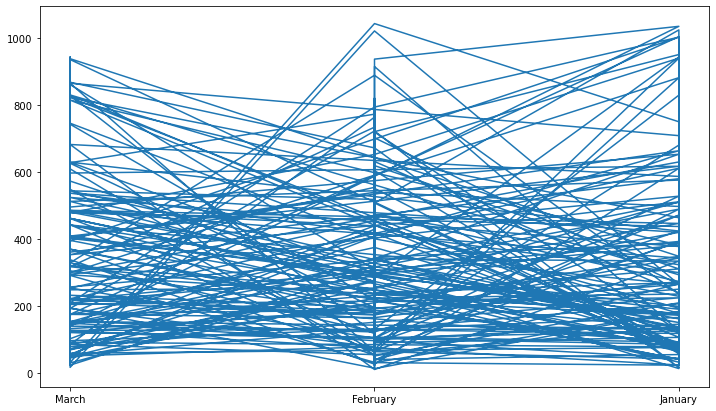

In [45]:
a = Naypyitaw_df["Total"]
b = Yangon_df["gross income"]
c = Mandalay_df["gross income"]
x = Naypyitaw_df["Month"]
plt.figure(figsize=(12,7))
plt.plot(x,a)

In [46]:
df.head()

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Hour,Month
Invoice ID,,,,,,,,,,,,,,,,,
750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,13,January
226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,10,March
631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,13,March
123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,20,January
373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,10,February


In [47]:
df["Gender"].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

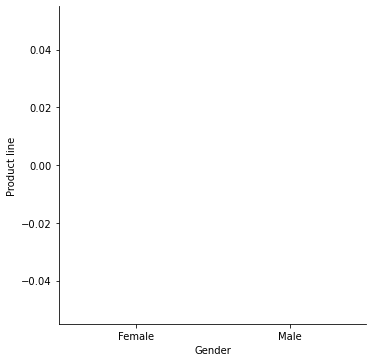

In [49]:
sns.lineplot(data= df,x = "Gender",y ="tip")
plt.show()